In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Read the CSV and Meta Data after imprting all the packages required. 

In [5]:
salary_data = pd.read_csv('salary.csv')
salary_meta = pd.read_csv('Salary metadata.csv', sep=';')

In [6]:
salary_data.head(10)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1
5,56000.0,1,0,0,1.19,1,0,1,1,1,0
6,61008.0,0,2,2,1.33,1,0,1,1,2,0
7,39986.0,0,2,0,0.99,1,0,1,1,4,0
8,36308.0,0,2,1,0.85,1,0,1,1,1,1
9,55000.0,0,0,0,1.23,1,0,1,1,1,1


## Meta Data shows that most of our data is Conitnous, with male, degree and other qualifications being binary, yes or no answeers. THe position and Field are Continous types,giving us premise to use One-hot necoding or get dummies to furhter investigate these values

In [7]:
display(salary_meta)

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [8]:
display(salary_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.2 KB


None

In [9]:
salary_data = salary_data.dropna()

## From the Correlation, There is a high correlation between the Dependant variable which is the Salary and position, yearsworked and yearsrank respectively. The Fields have a negative correlation to the Salary.

In [10]:
salary_data.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


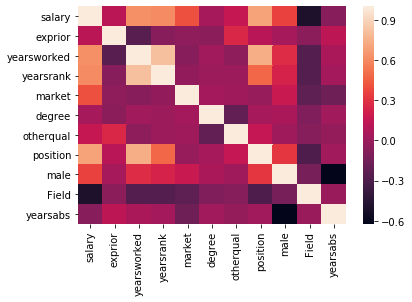

In [11]:
correalation_map = sns.heatmap(salary_data.corr())

## From the correlation heatmap and pairwise correlation, a further investigation of the highest ranked correlations was done, we found that the continous types had a linear relationship to the dependant variables. THe categorical types gave vertical slopes, therefore further invetigation on what the data looks like had to be done.

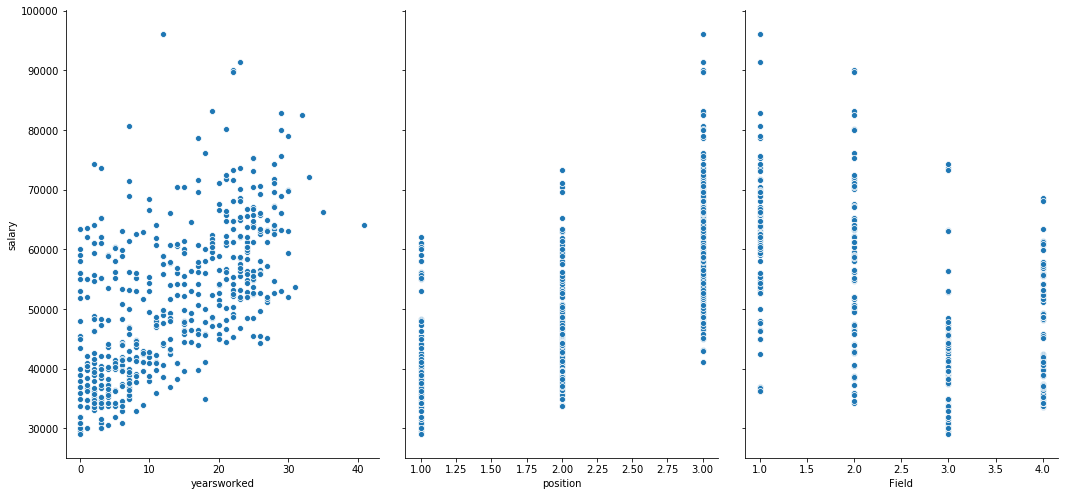

In [19]:
sns.pairplot(salary_data, x_vars=['yearsworked','position','Field'], y_vars='salary',height=7, aspect=0.7, kind='scatter')
# Make a boxplot

## To observe the min and max of the different fields, aswell as where the mean lies and how they compare to each other, boxplots were created and view side by side for better comparison. it was observed thtat engineers tend to get paid more that all the other fields, with the Human Resources field being the lowest paid, their maximun is less than the engineering Mean, which could prove to be difficult using the Field to predict the salary, the correlation might be high, but the data is spread differently in their Fields respectively.

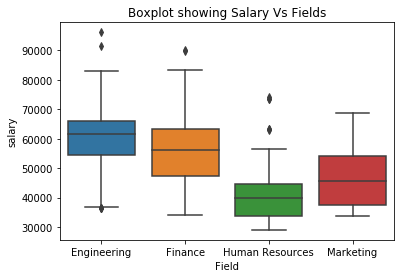

In [13]:
Fields = sns.boxplot(data = salary_data, x='Field', y='salary')
Fields.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
plt.title('Boxplot showing Salary Vs Fields')
plt.show()

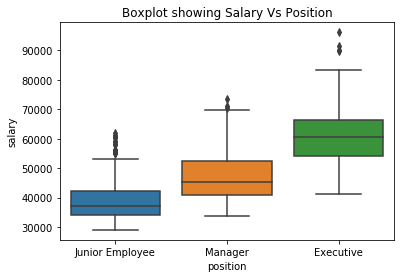

In [20]:
positions = sns.boxplot(data = salary_data, x='position', y='salary')
positions.set_xticklabels(['Junior Employee', 'Manager','Executive'])
plt.title('Boxplot showing Salary Vs Position')
plt.show()

## For further analysis, the Fields was then seperated using get_dummies method, seperating all the fields into thier respective fields. From this the relationship was tested if the Field salary was affected by the position, if so did the executives fair the same throughout the Fields, were Junior Emploeyees recieving higher than other positions in other Fields, if so how did this affect the data. 

In [21]:
fields = pd.get_dummies(salary_data.Field, prefix = 'Field')

In [22]:
fields = fields.rename(columns={"Field_1": "Engineering", "Field_2": "Finance", "Field_3":"Human Resources", "Field_4": "Marketing"})

fields.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [23]:
dataframes = [salary_data, fields]
salary_merged = pd.concat(dataframes, axis=1)
salary_merged.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1


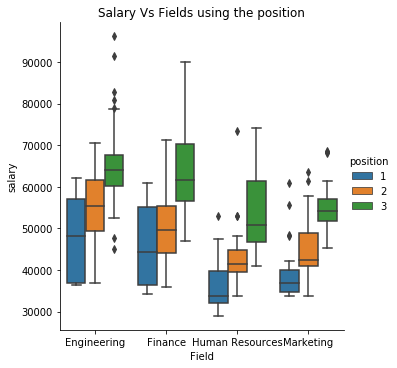

In [24]:
field_pos = sns.catplot(data=salary_merged, x='Field', y='salary', hue='position', kind='box')
field_pos.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
plt.title('Salary Vs Fields using the position')
plt.show()

## The count was viewed, the data is evenly distributed, wiht marketing having the most datat points, although the difference was not a major influnece, as the means were used instead of the seperate counts.

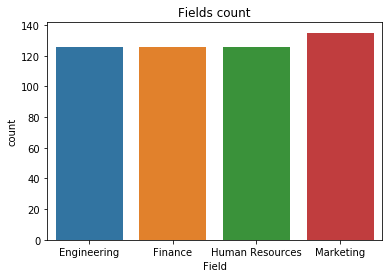

In [30]:
count = sns.countplot(data = salary_merged, x = 'Field')
count.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
plt.title('Fields count')
plt.show()

In [15]:
salary_merged.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630,0.426059,0.231626,-0.435815,-0.216884
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022,0.053511,0.001509,-0.041037,-0.013669
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113,0.218146,0.151929,-0.267442,-0.100326
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962,0.198489,0.170245,-0.241413,-0.124460
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177,0.198321,0.120408,-0.250358,-0.066834
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447,0.084197,0.034974,-0.063472,-0.054448
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792,0.029562,0.095212,-0.079855,-0.043909
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521,0.262830,0.141211,-0.306571,-0.095280
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058,0.151101,0.025520,-0.162851,-0.013460
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778,-0.773769,-0.266817,0.240135,0.782461


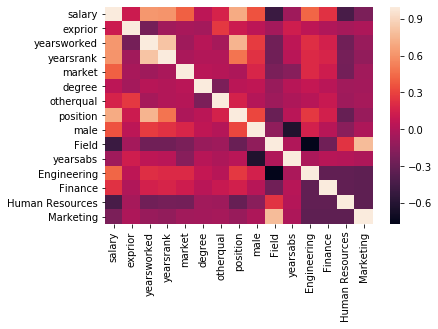

In [16]:
correalation_new = sns.heatmap(salary_merged.corr())

## The positions were further analyzed using get_dummies, this assisted in investigated the categorical values and merged to the final Data frame, whilst observing the correlatin after the values we seperated and the  postions column was drop in order to avoid duplication of data

In [26]:
salary_final = salary_merged.drop(['Field','exprior','market','degree','otherqual','male','yearsabs'], axis = 1)

In [27]:
salary_final.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,1,0,0,1,0
1,58000.0,0,0,1,0,1,0,0
2,45500.0,0,0,1,0,0,1,0
3,35782.0,2,1,1,0,0,0,1
4,34731.0,2,2,1,0,0,0,1


In [28]:
positions = pd.get_dummies(salary_data.position, prefix = 'Position')
positions = positions.rename(columns={"Position_1": "Junior Employee", "Position_2": "Manager", "Position_3":"Executive"})

positions.tail()

,Junior Employee,Manager,Executive
509,0,1,0
510,0,0,1
511,0,0,1
512,0,0,1
513,0,0,1


In [29]:
new_dataframes = [salary_merged, positions]
new_dataframes = pd.concat(new_dataframes, axis=1)


In [22]:
final_Data = new_dataframes.drop(['Field','exprior','position','market','degree','otherqual','male','yearsabs'], axis = 1)
final_Data.head()

,salary,yearsworked,yearsrank,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,0,1,0,1,0,0
1,58000.0,0,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,0,1,0,1,0,0
3,35782.0,2,1,0,0,0,1,1,0,0
4,34731.0,2,2,0,0,0,1,1,0,0


## From the Final dataframe a correlation was used to determin whether to use the position or fields for the model. from this the models were tested and see how the scores fair against eachother.

In [35]:
X = salary_final.drop(['salary','position','yearsrank'], axis = 1)
y = salary_final.salary

## Split Data, the data was split into a 60 percent train size, using sklearn 

In [78]:
X_train,X_test,y_train, y_test = train_test_split(X, y, train_size=0.65,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(333, 5) (180, 5) (333,) (180,)


In [79]:
lm = LinearRegression()
# fit the model to the training data
results = lm.fit(X_train,y_train)
print(results.intercept_)

42066.35996536956


In [80]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
yearsworked,689.588917
Engineering,6320.048161
Finance,3736.307034
Human Resources,-5993.049414
Marketing,-4063.305781


In [81]:
y_pred = lm.predict(X_test)

In [82]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 89757845.485683
r_square_value : 0.45749154499797484


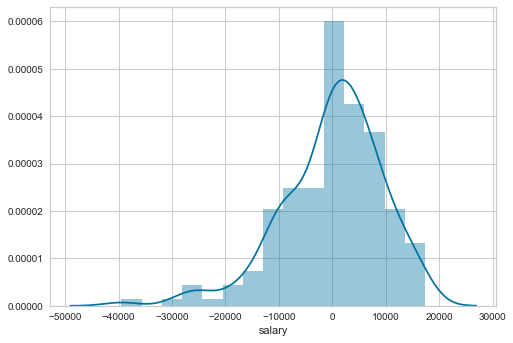

In [83]:
ypred = results.predict(X_test)
dist_pred = sns.distplot(ypred - y_test)

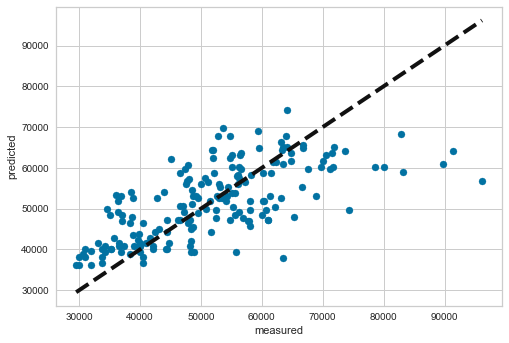

In [84]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

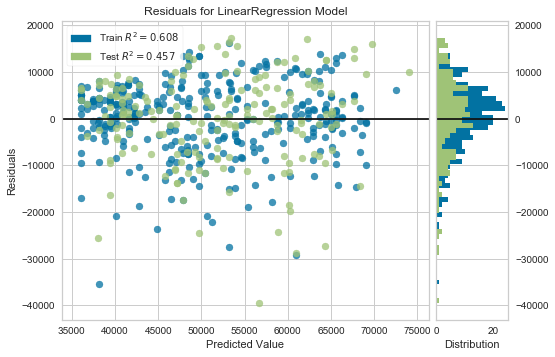

In [85]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(results)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()   

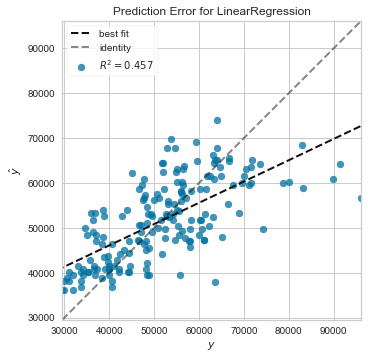

In [86]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(results)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [87]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('R² Test: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 89757845.49
R² Test: 0.46
